<a href="https://colab.research.google.com/github/hindanjali/Assignment2_part_a/blob/main/part_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/nature_12K.zip

In [4]:
train_dir="/content/inaturalist_12K/train"

In [5]:
import pathlib
train_dir = pathlib.Path(train_dir)

In [ ]:
list(train_dir.glob('*/*.jpg'))

In [6]:
image_count = len(list(train_dir.glob('*/*.jpg')))
print(image_count)

9999


In [7]:
test_dir="/content/inaturalist_12K/val"

In [8]:
import pathlib
test_dir = pathlib.Path(test_dir)

In [ ]:
Arachnida = list(test_dir.glob('Arachnida/*'))
Arachnida[:5]

In [ ]:
PIL.Image.open(str(Arachnida[100]))

In [ ]:
Amphibia = list(test_dir.glob('Amphibia/*'))
PIL.Image.open(str(Amphibia[8]))

In [9]:
test_count = len(list(test_dir.glob('*/*.jpg')))
print(test_count)

2000


In [10]:
train_nature_images_dict = {
    'Amphibia': list(train_dir.glob('Amphibia/*')),
    'Animalia': list(train_dir.glob('Animalia/*')),
    'Arachnida': list(train_dir.glob('Arachnida/*')),
    'Aves': list(train_dir.glob('Aves/*')),
    'Fungi': list(train_dir.glob('Fungi/*')),
    'Insecta': list(train_dir.glob('Insecta/*')),
    'Mammalia': list(train_dir.glob('Mammalia/*')),
    'Mollusca': list(train_dir.glob('Mollusca/*')),
    'Plantae': list(train_dir.glob('Plantae/*')),
    'Reptilia': list(train_dir.glob('Reptilia/*')),


}

In [11]:
nature_labels_dict = {
    'Amphibia': 0,
    'Animalia': 1,
    'Arachnida': 2,
    'Aves': 3,
    'Fungi': 4,
    'Insecta': 5,
    'Mammalia': 6,
    'Mollusca': 7,
    'Plantae': 8,
    'Reptilia': 9,
}

In [12]:
x_train, y_train= [], []
for nature, images in train_nature_images_dict.items():
    for image in images:
       # print(image)
        img = cv2.imread(str(image))
        try:
          resized_img = cv2.resize(img,(120,120))#, cv2.INTER_AREA)
        except cv2.error:
          continue
        x_train.append(resized_img)
        y_train.append(nature_labels_dict[nature])
        

In [13]:
test_nature_images_dict = {
    'Amphibia': list(test_dir.glob('Amphibia/*')),
    'Animalia': list(test_dir.glob('Animalia/*')),
    'Arachnida': list(test_dir.glob('Arachnida/*')),
    'Aves': list(test_dir.glob('Aves/*')),
    'Fungi': list(test_dir.glob('Fungi/*')),
    'Insecta': list(test_dir.glob('Insecta/*')),
    'Mammalia': list(test_dir.glob('Mammalia/*')),
    'Mollusca': list(test_dir.glob('Mollusca/*')),
    'Plantae': list(test_dir.glob('Plantae/*')),
    'Reptilia': list(test_dir.glob('Reptilia/*')),

}


In [14]:
x_test, y_test= [], []

for nature, images in test_nature_images_dict.items():
    for image in images:
        #print(image)
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(120,120))
        x_test.append(resized_img)
        y_test.append(nature_labels_dict[nature])

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.10)# random_state=0)
#print(len(x_train), len(x_val),len( y_train),len( y_val))

In [16]:
x_train = np.array(x_train)/255
y_train = np.array(y_train)

In [17]:
x_val = np.array(x_val)/255
y_val = np.array(y_val)

In [18]:
x_test = np.array(x_test)/255
y_test = np.array(y_test)

In [22]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(120, 120,3)),                                                     
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.4),
      
  ]
)

In [17]:
def cnv(n_filter,s_filter,actv,n_neurons,epochs,dropout,data_aug):

  output_classes = 10
  #n_filter=16
  # s_filter=3
  #actv='relu'
  #n_neurons=128
  if (data_aug == 'yes'):
    model = Sequential([
      data_augmentation,

      layers.Conv2D(n_filter, s_filter, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      tf.keras.layers.BatchNormalization(),
      layers.Conv2D(n_filter, s_filter, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(n_filter, s_filter, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(n_filter, s_filter, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(n_filter, s_filter, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(dropout),
      layers.Flatten(),
      layers.Dense(n_neurons, activation=actv),
      layers.Dense(output_classes)
      ])
  else:
    model = Sequential([
      layers.Conv2D(n_filter, s_filter, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      tf.keras.layers.BatchNormalization(),
      layers.Conv2D(n_filter, s_filter, padding='same', activation=actv),
      layers.MaxPooling2D(),
      layers.Conv2D(n_filter, s_filter, padding='same', activation=actv),
      layers.MaxPooling2D(),
      layers.Conv2D(n_filter, s_filter, padding='same', activation=actv),
      layers.MaxPooling2D(),
      layers.Conv2D(n_filter, s_filter, padding='same', activation=actv),
      layers.MaxPooling2D(),
      layers.Dropout(dropout),
      layers.Flatten(),
      layers.Dense(n_neurons, activation=actv),
      layers.Dense(output_classes)

  ])
  model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  #model.fit(x_train, y_train, epochs=epochs)
  model.fit(x_train, y_train, epochs=epochs,validation_data=(x_val,y_val),callbacks=[WandbCallback()])



In [ ]:
cnv(64,3,'relu',128,1,0.3,'yes')

In [ ]:
model.evaluate(x_test,y_test)

In [20]:
label_name=['Amphibia',
    'Animalia',
    'Arachnida',
    'Aves',
    'Fungi',
    'Insecta',
    'Mammalia',
    'Mollusca',
    'Plantae',
    'Reptilia',]

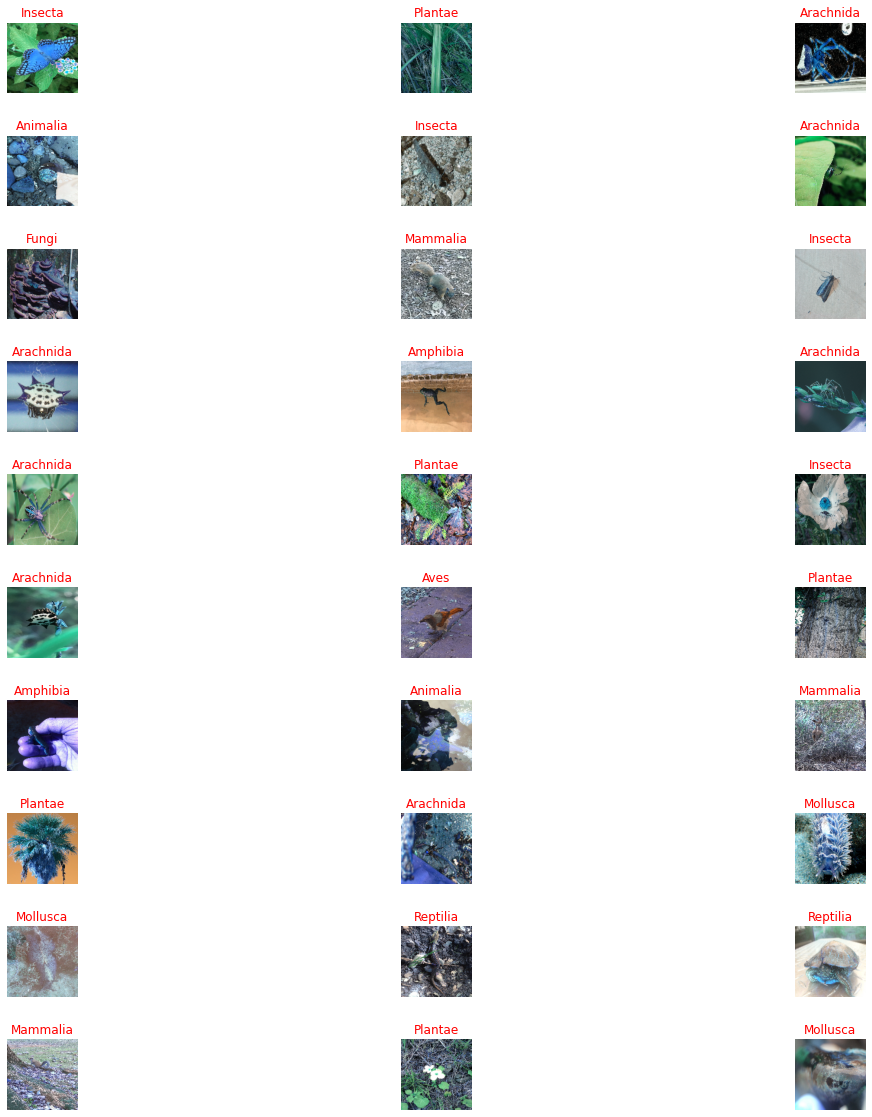

In [67]:
L_grid=10
W_grid=3
fig,axes = plt.subplots(L_grid,W_grid,figsize=(20,20))
axes=axes.ravel()
n_test=len(x_test)
for i in np.arange(0,L_grid * W_grid):
    index=np.random.randint(0,n_test)  
    axes[i].imshow(x_test[index])
    axes[i].set_title(label_name[y_test[index]],color='red') 
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.6)


In [27]:
output_classes = 10
#n_filter=16
# s_filter=3
actv='relu'
n_neurons=128
#if (data_aug == 'yes'):
#print('yes')
model = Sequential([
  data_augmentation,

  layers.Conv2D(64, 3, padding='same', activation=actv),
  layers.MaxPooling2D(),
  tf.keras.layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation=actv),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation=actv),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation=actv),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation=actv),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(n_neurons, activation=actv),
  layers.Dense(output_classes)
  ])


In [29]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
# model.fit(x_train, y_train, epochs=epochs,validation_data=(x_val,y_val),callbacks=[WandbCallback()])

#model.evaluate(x_test,y_test)

Epoch 1/5
282/282 [==============================] - 378s 1s/step - loss: 2.2555 - accuracy: 0.1542
Epoch 2/5
282/282 [==============================] - 375s 1s/step - loss: 2.1451 - accuracy: 0.2194
Epoch 3/5
282/282 [==============================] - 372s 1s/step - loss: 2.0921 - accuracy: 0.2448
Epoch 4/5
282/282 [==============================] - 371s 1s/step - loss: 2.0705 - accuracy: 0.2527
Epoch 5/5
282/282 [==============================] - 366s 1s/step - loss: 2.0348 - accuracy: 0.2668


In [31]:
layer=model.layers
filters,biases=model.layers[1].get_weights()

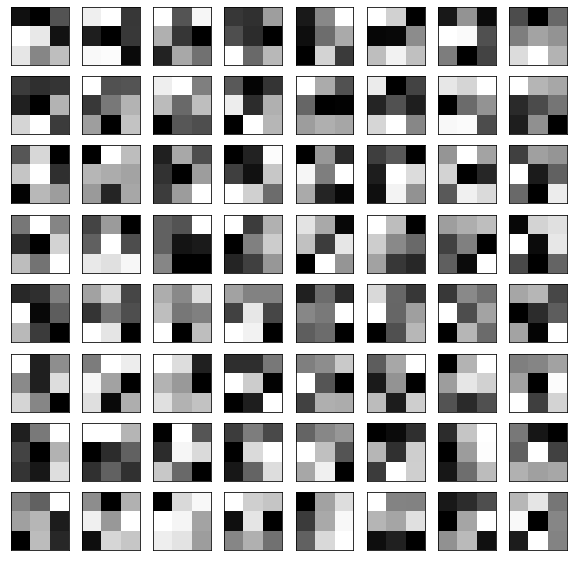

In [32]:
fig=plt.figure(figsize=(10,10))
row=8
col=8
n_filters=row*col
for i in range(1,n_filters+1):
  f=filters[:,:,:,i-1]
  fig=plt.subplot(row,col,i)
  fig.set_xticks([])
  fig.set_yticks([])
  plt.imshow(f[:,:,0],cmap='gray')
plt.show()

In [85]:
import wandb
from wandb.keras import WandbCallback

wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [88]:
sweep_config={
    'method':'random',
    'metrix' :
    {'name':'accuracy',
    'goal' : 'maximize'
  },
  'parameters':{
   'n_filter':{'values':[16,32,64]},
   'dropout':{'values':[0.2,0.3]},
   'data_aug':{'values':['yes','no']},
   'batch_norm':{'values':['yes','no']},
   'learning_rate':{'values':[0.0001,0.001] },
   'epochs':{'values':[2,3,4,5,7,10]},
   'activation_f':{'values':['tanh','relu']},
   'n_neurons':{'values':[32,64,128]},
   's_filter':{'values':[3,5,10]},
   'weight_decay':{'values':[0.0005,0.5]},
  }
}


In [89]:
def a1():
  config_defaults={
  'epochs':5,
  'learning_rate':0.0001,
  'dropout':0.3,
  'data_aug':'yes',
  'batch_norm':'yes',
  'n_filter':64,
  'n_neurons':64,
  's_filter':3,
  'activation_f':'relu'
  }

  run=wandb.init(config=config_defaults)

  config=wandb.config

  cnv(config.n_filter,config.s_filter,config.activation_f,config.n_neurons,config.epochs,config.dropout,config.data_aug)

  #model.summary()model.summary()
  #model.summary()
  #print(model.summary())
  #model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

  #model.fit(x_train, y_train, epochs=config.epochs,validation_data=(x_val,y_val),callbacks=[WandbCallback()])



In [ ]:
sweep_id = wandb.sweep(sweep_config,project="Assign2_part_a")

In [ ]:
wandb.agent(sweep_id,a1)